# Run CleanVision on a Hugging Face dataset

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/cleanlab/cleanvision/blob/main/docs/source/tutorials/huggingface_dataset.ipynb)

In [1]:
!pip install -U pip
!pip install "cleanvision[huggingface] @ git+https://github.com/cleanlab/cleanvision.git"

  Cloning https://github.com/cleanlab/cleanvision.git to /private/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/pip-install-xwtdi4y8/cleanvision_6d3f28641faa4f23957e46506fc19303
  Running command git clone --filter=blob:none --quiet https://github.com/cleanlab/cleanvision.git /private/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/pip-install-xwtdi4y8/cleanvision_6d3f28641faa4f23957e46506fc19303
  Resolved https://github.com/cleanlab/cleanvision.git to commit 2814ed82daddb41692c3b2b06d7296ef14c243c5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


  Created wheel for cleanvision: filename=cleanvision-0.3.5-py3-none-any.whl size=55593 sha256=5e6d99df4f334fa87b57642fa3cc87b9765b9bd12c0b32d3707811461f4c9504
  Stored in directory: /private/var/folders/cj/qtbz9fvd3svc0x28yv2756mh0000gn/T/pip-ephem-wheel-cache-2m_9d4hb/wheels/62/b5/93/1e928b2ed86f4723a6f82d41084fe213c8e28e744104d35a0f
Successfully built cleanvision
  Attempting uninstall: cleanvision
    Found existing installation: cleanvision 0.3.4
    Uninstalling cleanvision-0.3.4:
      Successfully uninstalled cleanvision-0.3.4


**After you install these packages, you may need to restart your notebook runtime before running the rest of this notebook.**

In [2]:
# Impoort the notebooks: Huggingface's datasets and cleanvision
from datasets import load_dataset
from cleanvision import Imagelab

### 1. Download dataset

[cats_vs_dogs](https://huggingface.co/datasets/cats_vs_dogs) is a subset of Assira dataset which contains millions of images of pets classified into cats and dogs.

Please note though this a classification dataset, CleanVision can be used to audit images from any type of dataset (including supervised or unsupervised learning).

Load train split of the dataset.

In [3]:
dataset = load_dataset("cats_vs_dogs", split="train")

See more information on the dataset like features and number of examples

In [4]:
dataset

Dataset({
    features: ['image', 'labels'],
    num_rows: 23410
})

`dataset.features` is a `dict[column_name, column_type]` that contains information about the different columns in the dataset and the type of each column. Use `dataset.features` to find the key that contains the Image feature.

In [5]:
dataset.features

{'image': Image(decode=True, id=None),
 'labels': ClassLabel(names=['cat', 'dog'], id=None)}

### 2. View sample images in the dataset

Initialize Imagelab

In [6]:
imagelab = Imagelab(hf_dataset=dataset, image_key="image")

Sample images from the dataset


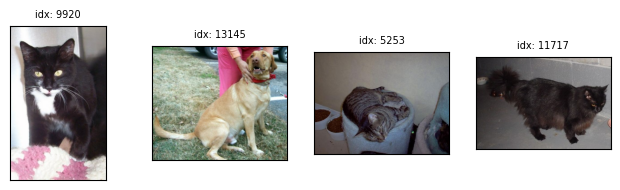

In [7]:
imagelab.visualize()

### 3. Run CleanVision

In [8]:
imagelab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/23410 [00:00<?, ?it/s]

  0%|          | 0/23410 [00:00<?, ?it/s]

Issue checks completed. 127 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


### 4. View Results
Get a report of all the issues found

Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |           49 |
|  1 | exact_duplicates |           48 |
|  2 | near_duplicates  |           12 |
|  3 | grayscale        |            5 |
|  4 | low_information  |            5 |
|  5 | odd_aspect_ratio |            5 |
|  6 | dark             |            1 |
|  7 | light            |            1 |
|  8 | odd_size         |            1 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 49
Examples representing most severe instances of this issue:



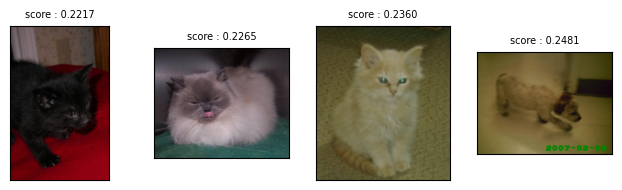

----------------- exact_duplicates images ------------------

Number of examples with this issue: 48
Examples representing most severe instances of this issue:

Set: 0


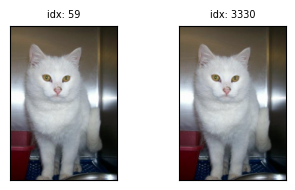

Set: 1


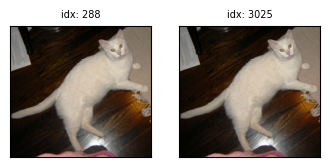

Set: 2


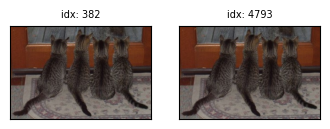

Set: 3


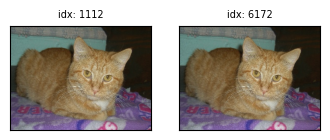

------------------ near_duplicates images ------------------

Number of examples with this issue: 12
Examples representing most severe instances of this issue:

Set: 0


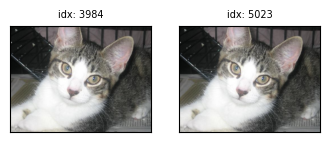

Set: 1


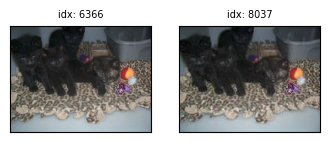

Set: 2


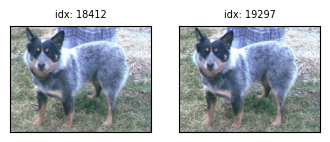

Set: 3


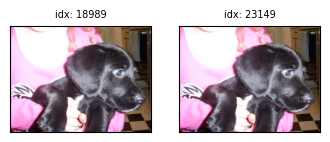

--------------------- grayscale images ---------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



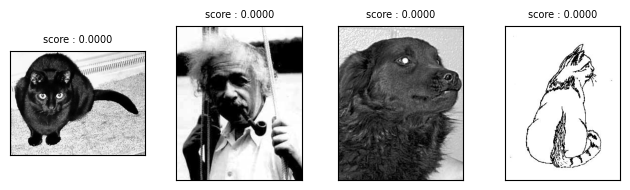

------------------ low_information images ------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



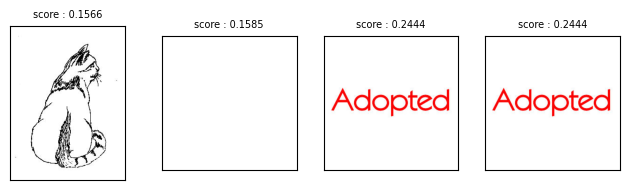

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



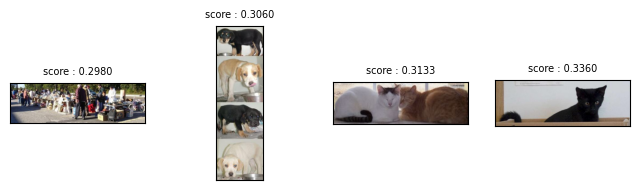

----------------------- dark images ------------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



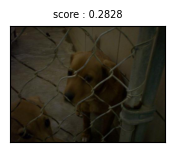

----------------------- light images -----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



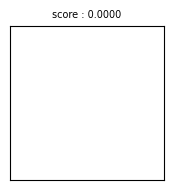

--------------------- odd_size images ----------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



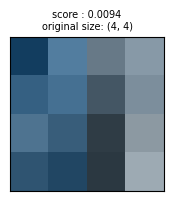

In [9]:
imagelab.report()

View more information about each image, such as what types of issues it exhibits and its quality score with respect to each type of issue.

In [10]:
imagelab.issues

,odd_size_score,is_odd_size_issue,odd_aspect_ratio_score,is_odd_aspect_ratio_issue,low_information_score,is_low_information_issue,light_score,is_light_issue,grayscale_score,is_grayscale_issue,dark_score,is_dark_issue,blurry_score,is_blurry_issue,exact_duplicates_score,is_exact_duplicates_issue,near_duplicates_score,is_near_duplicates_issue
0,0.987927,False,0.750000,False,0.886329,False,0.916612,False,1,False,0.915625,False,0.419102,False,1.0,False,1.0,False
1,0.678716,False,0.936667,False,0.870913,False,0.920491,False,1,False,0.679669,False,0.389699,False,1.0,False,1.0,False
2,0.865139,False,0.978000,False,0.926407,False,0.947426,False,1,False,0.916317,False,0.478126,False,1.0,False,1.0,False
3,0.952989,False,0.806000,False,0.910463,False,0.741769,False,1,False,0.995705,False,0.507646,False,1.0,False,1.0,False
4,0.350643,False,1.000000,False,0.936971,False,0.944575,False,1,False,0.968940,False,0.492275,False,1.0,False,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23405,0.607332,False,0.750000,False,0.812455,False,0.956905,False,1,False,0.755658,False,0.410711,False,1.0,False,1.0,False
23406,0.707879,False,0.748571,False,0.856650,False,0.916063,False,1,False,0.661844,False,0.366442,False,1.0,False,1.0,False
23407,0.987927,False,0.750000,False,0.902067,False,0.870589,False,1,False,0.907316,False,0.522120,False,1.0,False,1.0,False
23408,0.950985,False,0.662000,False,0.903922,False,0.792583,False,1,False,0.957101,False,0.438148,False,1.0,False,1.0,False


Get indices of all **blurry** images in the dataset sorted by their blurry score.

In [11]:
indices = imagelab.issues.query('is_blurry_issue').sort_values(by='blurry_score').index.tolist()

View the 8th blurriest image in the dataset

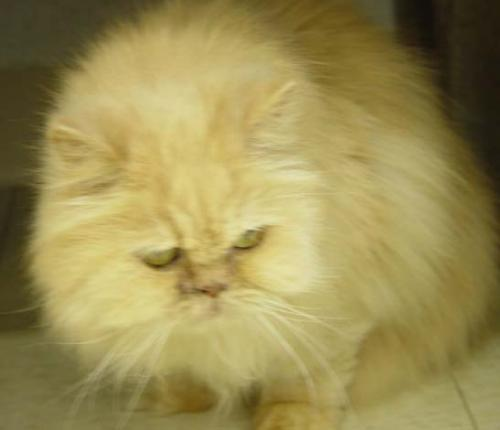

In [12]:
dataset[indices[8]]['image']

View global information about each issue, such as how many images in the dataset suffer from this issue.

In [13]:
imagelab.issue_summary

,issue_type,num_images
0,blurry,49
1,exact_duplicates,48
2,near_duplicates,12
3,grayscale,5
4,low_information,5
5,odd_aspect_ratio,5
6,dark,1
7,light,1
8,odd_size,1


**For more detailed guide on how to use CleanVision, check the [tutorial notebook](https://github.com/cleanlab/cleanvision/blob/main/docs/source/tutorials/tutorial.ipynb).**